In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('D:\\INSEA\\Stage PFA\\Stage Ministère de finance\\data\\tourism\\TES_with_feuters.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('MS')  # MS = Month Start
df = df.sort_index()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2010-02-01 to 2025-04-01
Freq: MS
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TES              183 non-null    float64
 1   marrakech_lag_1  183 non-null    float64
 2   review_count     183 non-null    float64
 3   NSI              183 non-null    float64
 4   is_pandemic      183 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 8.6 KB


In [66]:
exog_variables=['marrakech_lag_1', 'review_count', 'NSI','is_pandemic']


### Modling

#### premier décomposition

In [67]:
train_a=df.loc['02-2010':'04-2020']
test_a=df.loc['05-2020':]

X_train_a = train_a[exog_variables]
X_test_a = test_a[exog_variables]
y_train_a = train_a['TES']
y_test_a = test_a['TES']
print("taille du train:",len(train_a),"\ntaille du test :",len(test_a))

taille du train: 123 
taille du test : 60


#### deuxiéme decomposition

In [68]:
train_b=df.loc['01-2010':'12-2024']
test_b=df.loc['01-2023':]
X_train_b = train_b[exog_variables]
X_test_b = test_b[exog_variables]
y_train_b = train_b['TES']
y_test_b = test_b['TES']
print("taille du train:",len(train_b),"\ntaille du test :",len(test_b))

taille du train: 179 
taille du test : 28


#### troisiéme décomposition

In [96]:
train_c=df.loc['02-2010':'12-2023']
test_c=df.loc['01-2024':]
X_train_c = train_c[exog_variables]
X_test_c = test_c[exog_variables]
y_train_c = train_c['TES']
y_test_c = test_c['TES']
print("taille du train:",len(train_c),"\ntaille du test :",len(test_c))

taille du train: 167 
taille du test : 16


In [70]:
def optimize_hyperparameters(X_train, y_train):
    """
    Optimise les hyperparamètres du Random Forest avec GridSearchCV
    """
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print("Meilleurs paramètres:", grid_search.best_params_)
    print("Meilleur score (MSE négatif):", grid_search.best_score_)
    
    return grid_search.best_params_

In [71]:
meilleur=optimize_hyperparameters(X_train_a, y_train_a)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score (MSE négatif): -11757257462.64978


In [73]:
model = RandomForestRegressor(
        n_estimators=meilleur["n_estimators"],
        max_depth=meilleur["max_depth"],
        min_samples_split=meilleur["min_samples_split"],
        min_samples_leaf=meilleur["min_samples_leaf"],
        random_state=42,
        n_jobs=-1
    )
model.fit(X_train_a, y_train_a)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [74]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


--- Random Forest Model Evaluation ---
RMSE: 193,696.85
MAPE: inf%
MAE: 133,437.99
R²: 0.59


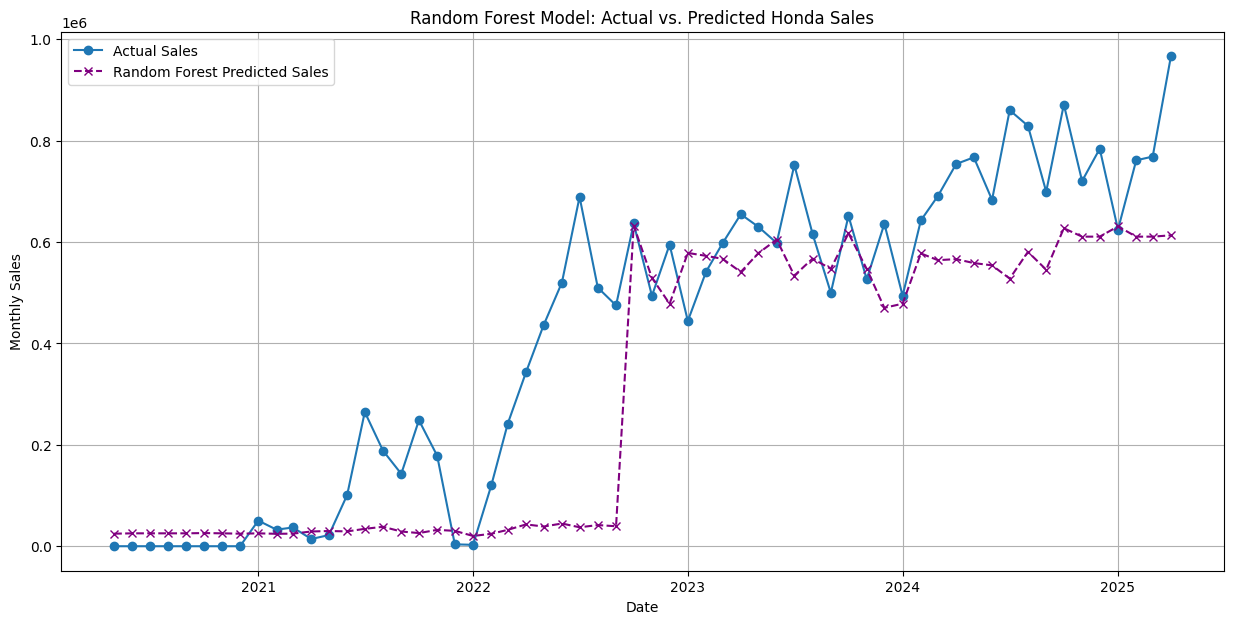

In [75]:
# Make predictions
y_pred = model.predict(X_test_a)

# Evaluate the model
rmse = root_mean_squared_error(y_test_a, y_pred)
mape = calculate_mape(y_test_a, y_pred)
mae = mean_absolute_error(y_test_a, y_pred)
r2 = r2_score(y_test_a, y_pred)

print("\n--- Random Forest Model Evaluation ---")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:,.2f}%")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:,.2f}")

# Plot predictions vs. actuals
plt.figure(figsize=(15, 7))
plt.plot(y_test_a.index, y_test_a.values, label='Actual Sales', marker='o', linestyle='-')
plt.plot(y_test_a.index, y_pred, label='Random Forest Predicted Sales', marker='x', linestyle='--', color='purple')
plt.title('Random Forest Model: Actual vs. Predicted Honda Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
meilleur=optimize_hyperparameters(X_train_b, y_train_b)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score (MSE négatif): -29556101650.646465


In [77]:
model = RandomForestRegressor(
        n_estimators=meilleur["n_estimators"],
        max_depth=meilleur["max_depth"],
        min_samples_split=meilleur["min_samples_split"],
        min_samples_leaf=meilleur["min_samples_leaf"],
        random_state=42,
        n_jobs=-1
    )
model.fit(X_train_b, y_train_b)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)


--- Random Forest Model Evaluation ---
RMSE: 64,160.17
MAPE: 6.71%
MAE: 47,608.35
R²: 0.72


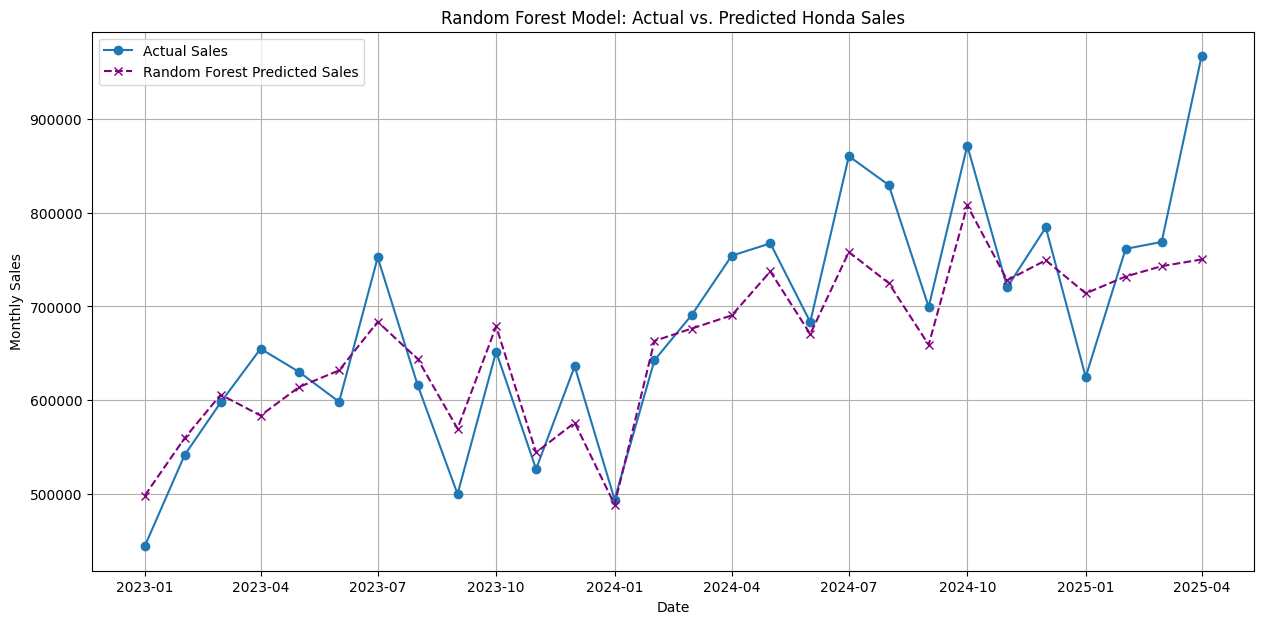

In [78]:
# Make predictions
y_pred = model.predict(X_test_b)

# Evaluate the model
rmse = root_mean_squared_error(y_test_b, y_pred)
mape = calculate_mape(y_test_b, y_pred)
mae = mean_absolute_error(y_test_b, y_pred)
r2 = r2_score(y_test_b, y_pred)

print("\n--- Random Forest Model Evaluation ---")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:,.2f}%")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:,.2f}")

# Plot predictions vs. actuals
plt.figure(figsize=(15, 7))
plt.plot(y_test_b.index, y_test_b.values, label='Actual Sales', marker='o', linestyle='-')
plt.plot(y_test_b.index, y_pred, label='Random Forest Predicted Sales', marker='x', linestyle='--', color='purple')
plt.title('Random Forest Model: Actual vs. Predicted Honda Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
meilleur=optimize_hyperparameters(X_train_c, y_train_c)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Meilleur score (MSE négatif): -18301989877.806675


In [102]:
model = RandomForestRegressor(
        n_estimators=meilleur["n_estimators"],
        max_depth=meilleur["max_depth"],
        min_samples_split=meilleur["min_samples_split"],
        min_samples_leaf=meilleur["min_samples_leaf"],
        random_state=42,
        n_jobs=-1
    )
model.fit(X_train_c, y_train_c)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50,
                      n_jobs=-1, random_state=42)


--- Random Forest Model Evaluation ---
RMSE: 194,105.56
MAPE: 21.12%
MAE: 167,517.02
R²: -2.25


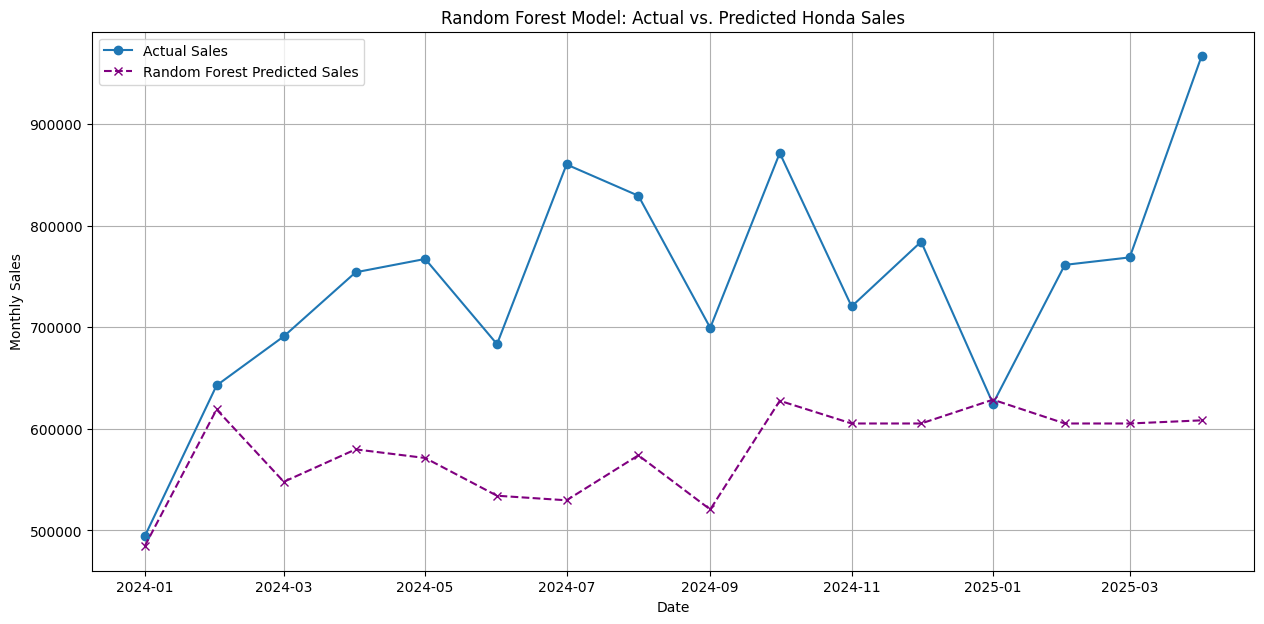

In [103]:
# Make predictions
y_pred = model.predict(X_test_c)

# Evaluate the model
rmse = root_mean_squared_error(y_test_c, y_pred)
mape = calculate_mape(y_test_c, y_pred)
mae = mean_absolute_error(y_test_c, y_pred)
r2 = r2_score(y_test_c, y_pred)

print("\n--- Random Forest Model Evaluation ---")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:,.2f}%")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:,.2f}")

# Plot predictions vs. actuals
plt.figure(figsize=(15, 7))
plt.plot(y_test_c.index, y_test_c.values, label='Actual Sales', marker='o', linestyle='-')
plt.plot(y_test_c.index, y_pred, label='Random Forest Predicted Sales', marker='x', linestyle='--', color='purple')
plt.title('Random Forest Model: Actual vs. Predicted Honda Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()


--- Random Forest Model Evaluation ---
RMSE: 48,292.39
MAPE: inf%
MAE: 33,194.72
R²: 0.93


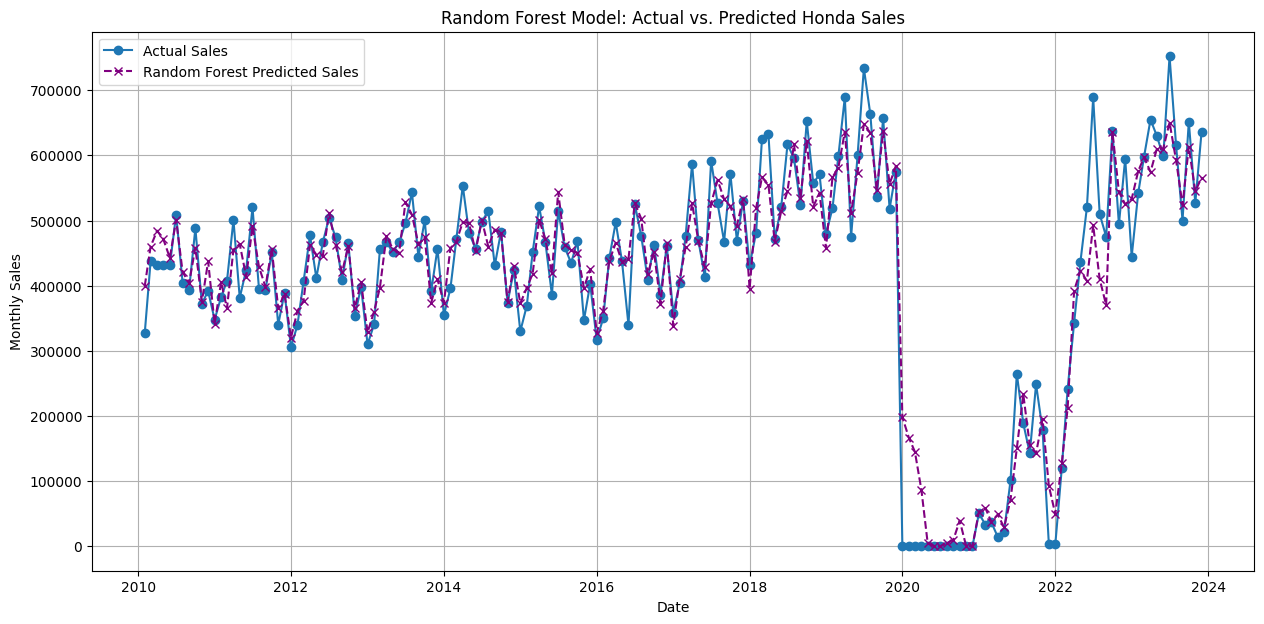

In [104]:
y_pred = model.predict(X_train_c)

# Evaluate the model
rmse = root_mean_squared_error(y_train_c, y_pred)
mape = calculate_mape(y_train_c, y_pred)
mae = mean_absolute_error(y_train_c, y_pred)
r2 = r2_score(y_train_c, y_pred)

print("\n--- Random Forest Model Evaluation ---")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:,.2f}%")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:,.2f}")

# Plot predictions vs. actuals
plt.figure(figsize=(15, 7))
plt.plot(y_train_c.index, y_train_c.values, label='Actual Sales', marker='o', linestyle='-')
plt.plot(y_train_c.index, y_pred, label='Random Forest Predicted Sales', marker='x', linestyle='--', color='purple')
plt.title('Random Forest Model: Actual vs. Predicted Honda Sales')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.legend()
plt.grid(True)
plt.show()


--- Analyzing Random Forest Feature Importance ---

Feature Importance (Sorted):
           feature  importance
0  marrakech_lag_1    0.518308
3      is_pandemic    0.369395
1     review_count    0.088868
2              NSI    0.023429


C:\Users\masta\AppData\Local\Temp\ipykernel_9780\3235849374.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='magma')


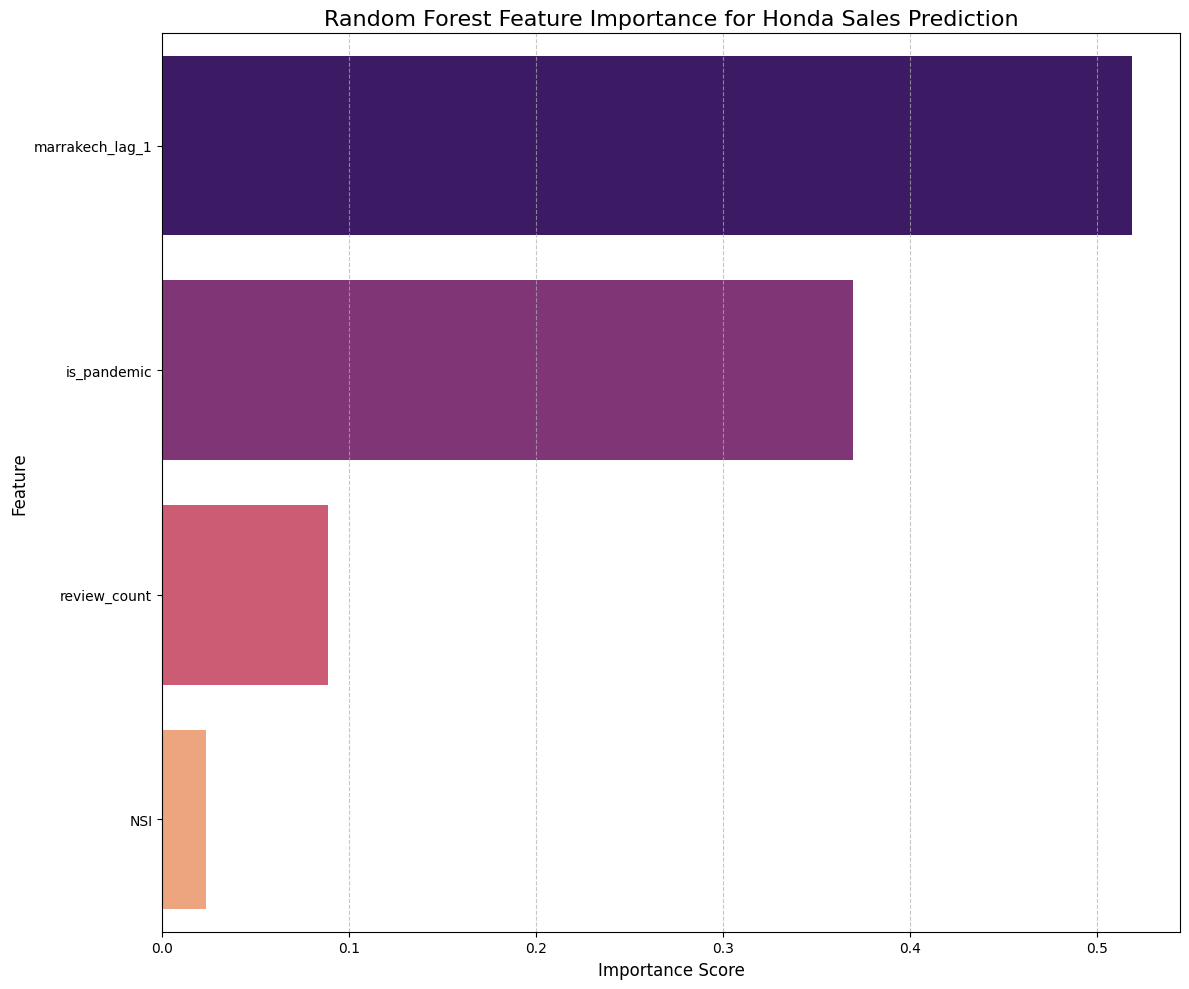

In [82]:
print("\n--- Analyzing Random Forest Feature Importance ---")

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'feature': exog_variables,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Sorted):")
print(importance_df.to_string())

# Plot the feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=importance_df, palette='magma')
plt.title('Random Forest Feature Importance for Honda Sales Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()